Takes the Single Cell seq data (the upregulated DE genes) and proccess it in to clusters and subclusters.

## Setup

### Imports

In [2]:
import numpy as np
import scanpy as sc
import os
import pandas as pd
import bbknn

### Single Cell settings

In [3]:
sc.settings.verbosity = 4
sc.settings.set_figure_params(80) 
sc.settings.file_format_figures = 'png'
sc.settings.savefigs = False
use_first_n_samples = 0
full_sparse = False

C:\Users\TzachiHNB2\AppData\Local\Temp\ipykernel_50712\738880785.py:2: FutureWarning: The specified parameters ('scanpy',) are no longer positional. Please specify them like `scanpy=80`
  sc.settings.set_figure_params(80)


### Defining a function for processing the data & determing the parameters

In [4]:
def processing_batch(adata, neighbors=15, key='batch', reso=0.4, random_state=0):  # Higher resolution yields more leiden clusters 
    sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, svd_solver='arpack')
    sc.logging.print_memory_usage()
    sc.pp.neighbors(adata, n_neighbors=neighbors)
    sc.pl.pca_variance_ratio(adata, log=True)
    bbknn.bbknn(adata, batch_key=key, neighbors_within_batch=2, metric='euclidean', n_pcs=30, trim=None)
    sc.tl.umap(adata)
    sc.tl.leiden(adata, resolution=reso)
    sc.pl.umap(adata, color='leiden')

### Reading the excisting h5ad files I created previously in QC pipeline 

In [5]:
#adata after QC
adata = sc.read(r'/Code/data/single_cell/animals/turtle/turtle_3/h5ads/painted_turtle/processed/''turtle_3_after_qc_new.h5ad') 

sc.read_h5ad(r'/Code/data/single_cell/animals/turtle/turtle_3/h5ads/painted_turtle/processed/''turtle_3_after_qc_new.h5ad')

# If the anndata object is processed and contains the raw data in adata.raw run -  adata = adata.raw.to_adata()

AnnData object with n_obs × n_vars = 27196 × 18199
    obs: 'n_genes_by_counts', 'total_counts', 'leiden', 'treatment', 'n_genes', 'total_counts_MT', 'pct_counts_MT', 'S_score', 'G2M_score', 'phase'
    var: 'gene_ids', 'n_cells_by_counts-control', 'mean_counts-control', 'pct_dropout_by_counts-control', 'total_counts-control', 'n_cells_by_counts-lf', 'mean_counts-lf', 'pct_dropout_by_counts-lf', 'total_counts-lf', 'n_cells_by_counts-lps', 'mean_counts-lps', 'pct_dropout_by_counts-lps', 'total_counts-lps', 'n_cells_by_counts-pic', 'mean_counts-pic', 'pct_dropout_by_counts-pic', 'total_counts-pic', 'n_cells', 'MT', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'treatment_colors'
    obsm: 'X_pca', 'X_umap'

In [6]:
adata.var

,gene_ids,n_cells_by_counts-control,mean_counts-control,pct_dropout_by_counts-control,total_counts-control,n_cells_by_counts-lf,mean_counts-lf,pct_dropout_by_counts-lf,total_counts-lf,n_cells_by_counts-lps,...,n_cells_by_counts-pic,mean_counts-pic,pct_dropout_by_counts-pic,total_counts-pic,n_cells,MT,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
TXNDC9,ENSCPBG00000005308,10,0.001509,99.812101,8.030085,12,0.003970,99.773157,21.0,21,...,20,0.006360,99.646643,36.0,63,False,63,0.001916,99.785867,56.365868
ECM2,ENSCPBG00000018460,87,0.014653,98.365276,77.985855,72,0.020227,98.638941,107.0,87,...,47,0.012014,99.169611,68.0,293,False,293,0.008557,99.004113,251.759399
PIK3AP1,ENSCPBG00000010156,11,0.001715,99.793311,9.128696,11,0.003025,99.792060,16.0,25,...,8,0.002297,99.858657,13.0,55,False,55,0.001630,99.813059,47.946060
GM10644,ENSCPBG00000011739,26,0.005531,99.511462,29.438486,21,0.006805,99.603025,36.0,41,...,5,0.001237,99.911661,7.0,93,False,93,0.003078,99.683899,90.555412
ENSCPBG00000014496,ENSCPBG00000014496,243,0.042961,95.434047,228.637787,176,0.043667,96.672968,231.0,599,...,118,0.024382,97.915194,138.0,1136,False,1136,0.034306,96.138812,1009.323486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DPH6,ENSCPBG00000023858,159,0.022512,97.012401,119.811218,143,0.030057,97.296786,159.0,178,...,90,0.019081,98.409894,108.0,570,False,570,0.014289,98.062608,420.405396
ENSCPBG00000021753,ENSCPBG00000021753,30,0.005092,99.436302,27.098412,50,0.015312,99.054820,81.0,51,...,30,0.006890,99.469965,39.0,161,False,161,0.004738,99.452772,139.389313
UGT3A2,ENSCPBG00000004707,12,0.002052,99.774521,10.920456,8,0.001890,99.848771,10.0,18,...,12,0.003004,99.787986,17.0,50,False,50,0.001414,99.830053,41.602383
PHKG2,ENSCPBG00000013786,20,0.003387,99.624201,18.022957,17,0.004159,99.678639,22.0,24,...,10,0.002473,99.823322,14.0,71,False,71,0.002044,99.758676,60.148571


In [7]:
adata.obs

,n_genes_by_counts,total_counts,leiden,treatment,n_genes,total_counts_MT,pct_counts_MT,S_score,G2M_score,phase
AAACCCAAGATGTAGT-control,218,215.547119,0,control,218,7.352441,3.411060,-0.084359,-0.072615,G1
AAACCCAAGGTCGTAG-control,158,163.719223,4,control,158,3.401197,2.077458,-0.054421,0.037763,G2M
AAACCCACAGCATCTA-control,576,546.419678,1,control,576,5.799093,1.061289,-0.184476,-0.234092,G1
AAACCCATCAGCATTG-control,622,630.827698,5,control,622,5.192957,0.823197,-0.160390,-0.062918,G1
AAACGAAAGGTTGAGC-control,482,492.935730,1,control,482,5.393628,1.094185,-0.008401,-0.028870,G1
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCACGAAAGC-pic,624,666.887756,6,pic,624,6.510258,0.976215,-0.004857,0.047678,G2M
TTTGTTGCAGAAGTTA-pic,263,247.457199,2,pic,263,3.688879,1.490714,-0.062725,0.113055,G2M
TTTGTTGCATGAAGGC-pic,133,128.395218,3,pic,133,0.000000,0.000000,0.009338,0.002591,S
TTTGTTGGTATGGAAT-pic,405,378.674591,1,pic,405,0.000000,0.000000,0.567868,-0.039889,S


### Preprocessing the data 

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    Gene indices [7777] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


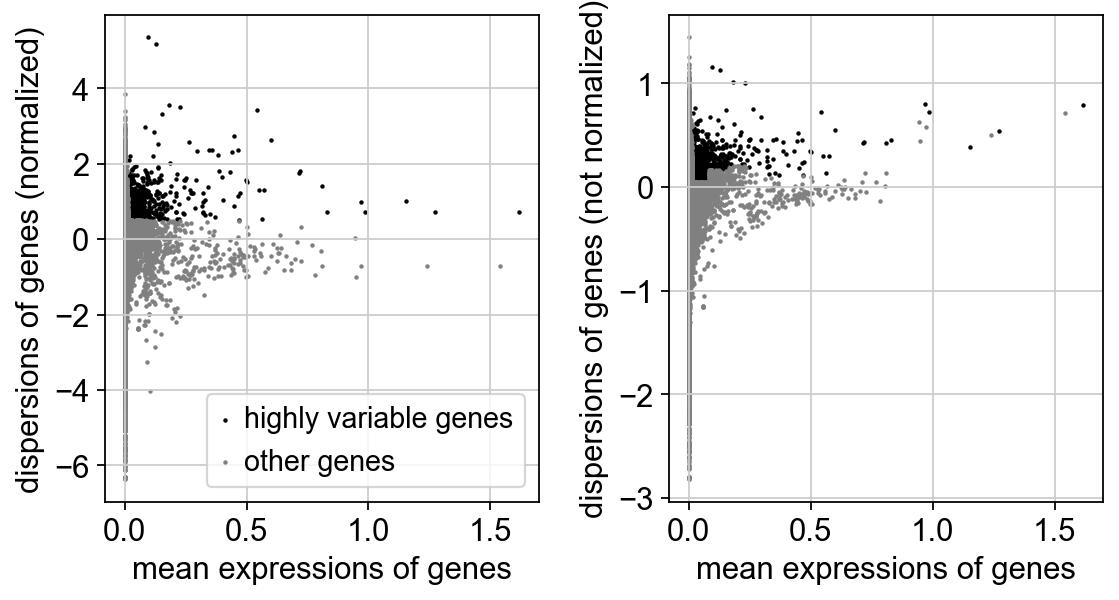

In [8]:
# Cleaning, normalizing, reducing dimensionality, clustering cells and creating visualizations.

sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
adata.raw = adata
# adata = adata[:, adata.var.highly_variable] # For filtering non Highly variable genes. We usually keep all the genes. 

In [9]:
sc.pp.regress_out(adata, ['total_counts','pct_counts_MT'])

# Got it from: https://github.com/theislab/single-cell-tutorial/issues/35
sc.pp.scale(adata, max_value=10)
sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata) 

regressing out ['total_counts', 'pct_counts_MT']
    sparse input is densified and may lead to high memory use
    finished (0:06:48)
    ... clipping at max_value 10
computing PCA
    with n_comps=50


c:\Python\Python310\lib\site-packages\scanpy\preprocessing\_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


    finished (0:00:11)
    and added
    'X_pca', the PCA coordinates (adata.obs)
    'PC1', 'PC2', ..., the loadings (adata.var)
    'pca_variance', the variance / eigenvalues (adata.uns)
    'pca_variance_ratio', the variance ratio (adata.uns)
computing neighbors
    computing neighbors
    using 'X_pca' with n_pcs = 50
    computed neighbors (0:00:35)
    computed connectivities (0:00:02)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:38)
computing UMAP


  0%|          | 0/200 [00:00<?, ?it/s]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:18)


    ... clipping at max_value 10
computing PCA
    with n_comps=50
    finished (0:00:12)
    and added
    'X_pca', the PCA coordinates (adata.obs)
    'PC1', 'PC2', ..., the loadings (adata.var)
    'pca_variance', the variance / eigenvalues (adata.uns)
    'pca_variance_ratio', the variance ratio (adata.uns)
Memory usage: current 4.76 GB, difference +4.76 GB
computing neighbors
        initialized `.distances` `.connectivities` 
    computing neighbors
    using 'X_pca' with n_pcs = 50
    computed neighbors (0:00:04)
    computed connectivities (0:00:00)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


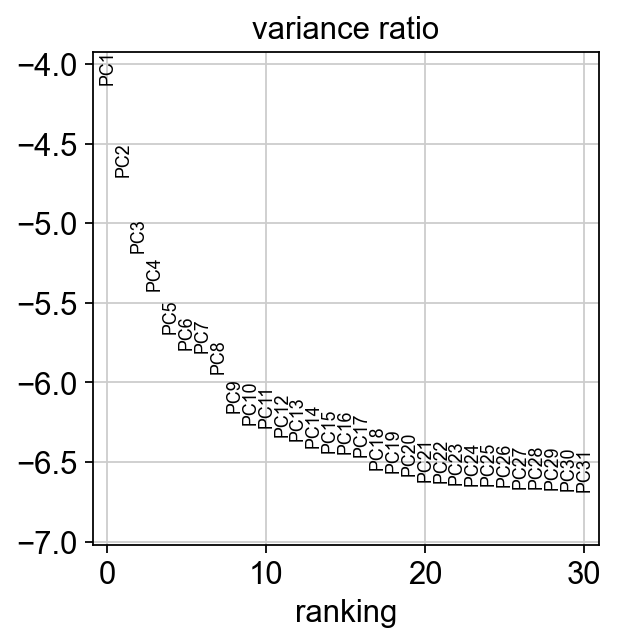

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP


  0%|          | 0/200 [00:00<?, ?it/s]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)
running Leiden clustering


C:\Users\TzachiHNB2\AppData\Local\Temp\ipykernel_50712\2800874316.py:9: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=reso)


    finished: found 11 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


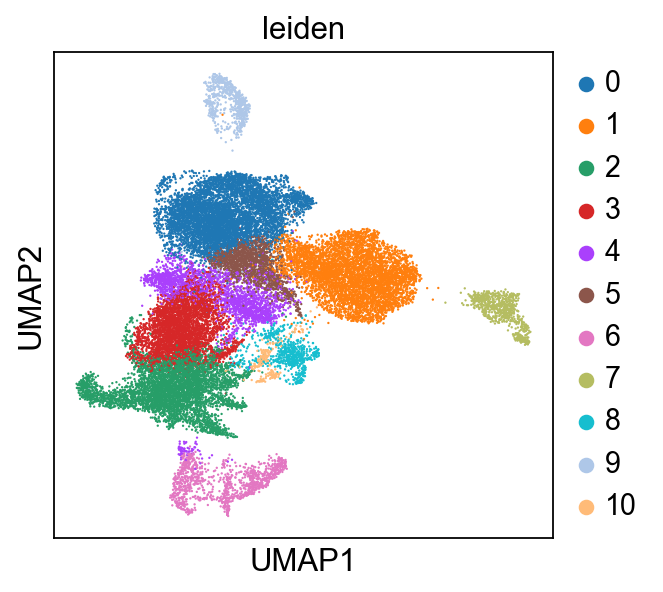

In [10]:
processing_batch(adata, key='treatment')  

In [11]:
sc.tl.rank_genes_groups(adata, groupby='treatment', method='wilcoxon')

ranking genes
    consider 'treatment' groups:
    with sizes: [ 4938  4848 12066  5344]
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:55)


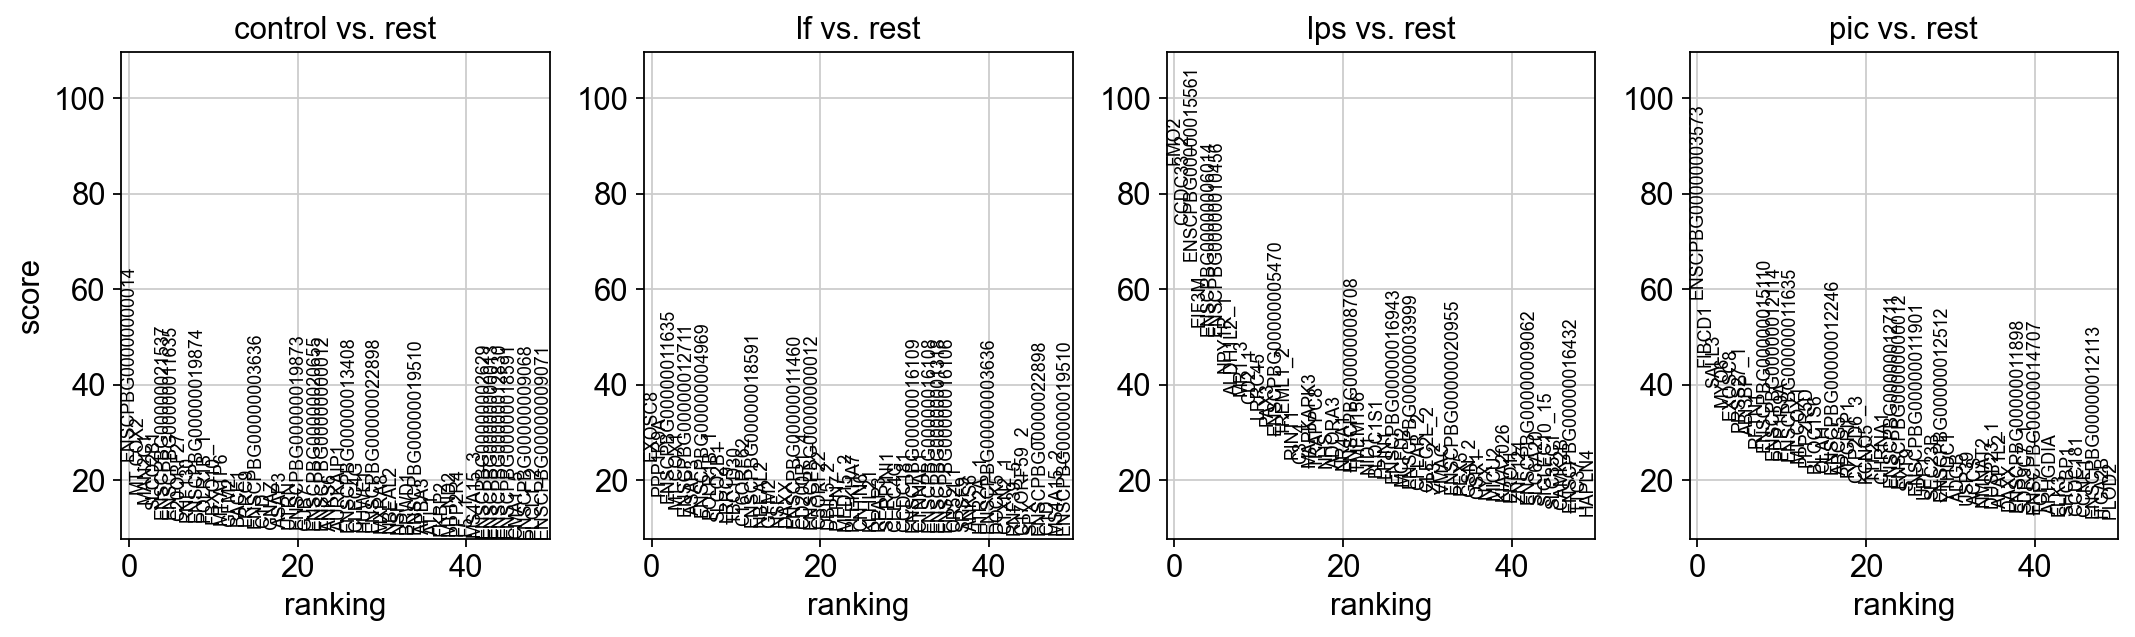

,control,lf,lps,pic
0,ENSCPBG00000000014,EXOSC8,FMO2,ENSCPBG00000003573
1,MT-COX2,PPP1R9A,CCDC33_2,FIBCD1
2,MAN2C1,ENSCPBG00000011635,ENSCPBG00000015561,SALL3
3,SLCO2B1,MT-COX1,EIF3M,MYO6
4,ENSCPBG00000021537,ENSCPBG00000012711,ENSCPBG00000006014,EXOSC8
5,ENSCPBG00000011635,ASAP3,ENSCPBG00000010456,PRSS27_1
6,C20ORF27,ENSCPBG00000004969,NPY1R_1,ABI3BP
7,RNF130,POLR1B_1,ALDH1L2,RFTN1
8,ENSCPBG00000019874,SLCO2B1,MR1_3,ENSCPBG00000015110
9,POLR1B_1,LRRC9,CD2_1,ENSCPBG00000012114


In [12]:
sc.pl.rank_genes_groups(adata, n_genes=50, sharey=True)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)

In [13]:
adata.obs['treatment'].value_counts()

treatment
lps        12066
pic         5344
control     4938
lf          4848
Name: count, dtype: int64

In [14]:
adata.obs

,n_genes_by_counts,total_counts,leiden,treatment,n_genes,total_counts_MT,pct_counts_MT,S_score,G2M_score,phase
AAACCCAAGATGTAGT-control,218,215.547119,1,control,218,7.352441,3.411060,-0.084359,-0.072615,G1
AAACCCAAGGTCGTAG-control,158,163.719223,4,control,158,3.401197,2.077458,-0.054421,0.037763,G2M
AAACCCACAGCATCTA-control,576,546.419678,3,control,576,5.799093,1.061289,-0.184476,-0.234092,G1
AAACCCATCAGCATTG-control,622,630.827698,1,control,622,5.192957,0.823197,-0.160390,-0.062918,G1
AAACGAAAGGTTGAGC-control,482,492.935730,2,control,482,5.393628,1.094185,-0.008401,-0.028870,G1
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCACGAAAGC-pic,624,666.887756,2,pic,624,6.510258,0.976215,-0.004857,0.047678,G2M
TTTGTTGCAGAAGTTA-pic,263,247.457199,1,pic,263,3.688879,1.490714,-0.062725,0.113055,G2M
TTTGTTGCATGAAGGC-pic,133,128.395218,4,pic,133,0.000000,0.000000,0.009338,0.002591,S
TTTGTTGGTATGGAAT-pic,405,378.674591,7,pic,405,0.000000,0.000000,0.567868,-0.039889,S


In [15]:
adata.var

,gene_ids,n_cells_by_counts-control,mean_counts-control,pct_dropout_by_counts-control,total_counts-control,n_cells_by_counts-lf,mean_counts-lf,pct_dropout_by_counts-lf,total_counts-lf,n_cells_by_counts-lps,...,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
TXNDC9,ENSCPBG00000005308,10,0.001509,99.812101,8.030085,12,0.003970,99.773157,21.0,21,...,63,0.001916,99.785867,56.365868,False,0.001555,0.225415,0.928448,-0.020831,0.414581
ECM2,ENSCPBG00000018460,87,0.014653,98.365276,77.985855,72,0.020227,98.638941,107.0,87,...,293,0.008557,99.004113,251.759399,False,0.003636,0.111754,0.656227,-0.019135,0.591327
PIK3AP1,ENSCPBG00000010156,11,0.001715,99.793311,9.128696,11,0.003025,99.792060,16.0,25,...,55,0.001630,99.813059,47.946060,False,0.000955,0.035839,0.474408,-0.018959,0.357449
GM10644,ENSCPBG00000011739,26,0.005531,99.511462,29.438486,21,0.006805,99.603025,36.0,41,...,93,0.003078,99.683899,90.555412,False,0.001241,0.117425,0.669810,-0.016996,0.461563
ENSCPBG00000014496,ENSCPBG00000014496,243,0.042961,95.434047,228.637787,176,0.043667,96.672968,231.0,599,...,1136,0.034306,96.138812,1009.323486,False,0.011427,-0.302571,-0.336097,-0.008960,0.875330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DPH6,ENSCPBG00000023858,159,0.022512,97.012401,119.811218,143,0.030057,97.296786,159.0,178,...,570,0.014289,98.062608,420.405396,False,0.003746,-0.675754,-1.229882,-0.014230,0.720226
ENSCPBG00000021753,ENSCPBG00000021753,30,0.005092,99.436302,27.098412,50,0.015312,99.054820,81.0,51,...,161,0.004738,99.452772,139.389313,False,0.001983,-0.019077,0.342881,-0.017619,0.533667
UGT3A2,ENSCPBG00000004707,12,0.002052,99.774521,10.920456,8,0.001890,99.848771,10.0,18,...,50,0.001414,99.830053,41.602383,False,0.001059,0.066295,0.547351,-0.019635,0.373760
PHKG2,ENSCPBG00000013786,20,0.003387,99.624201,18.022957,17,0.004159,99.678639,22.0,24,...,71,0.002044,99.758676,60.148571,False,0.000929,-0.227592,-0.156519,-0.017852,0.430916


#### UMAP's

##### T cells

KeyError: 'CXCR4'

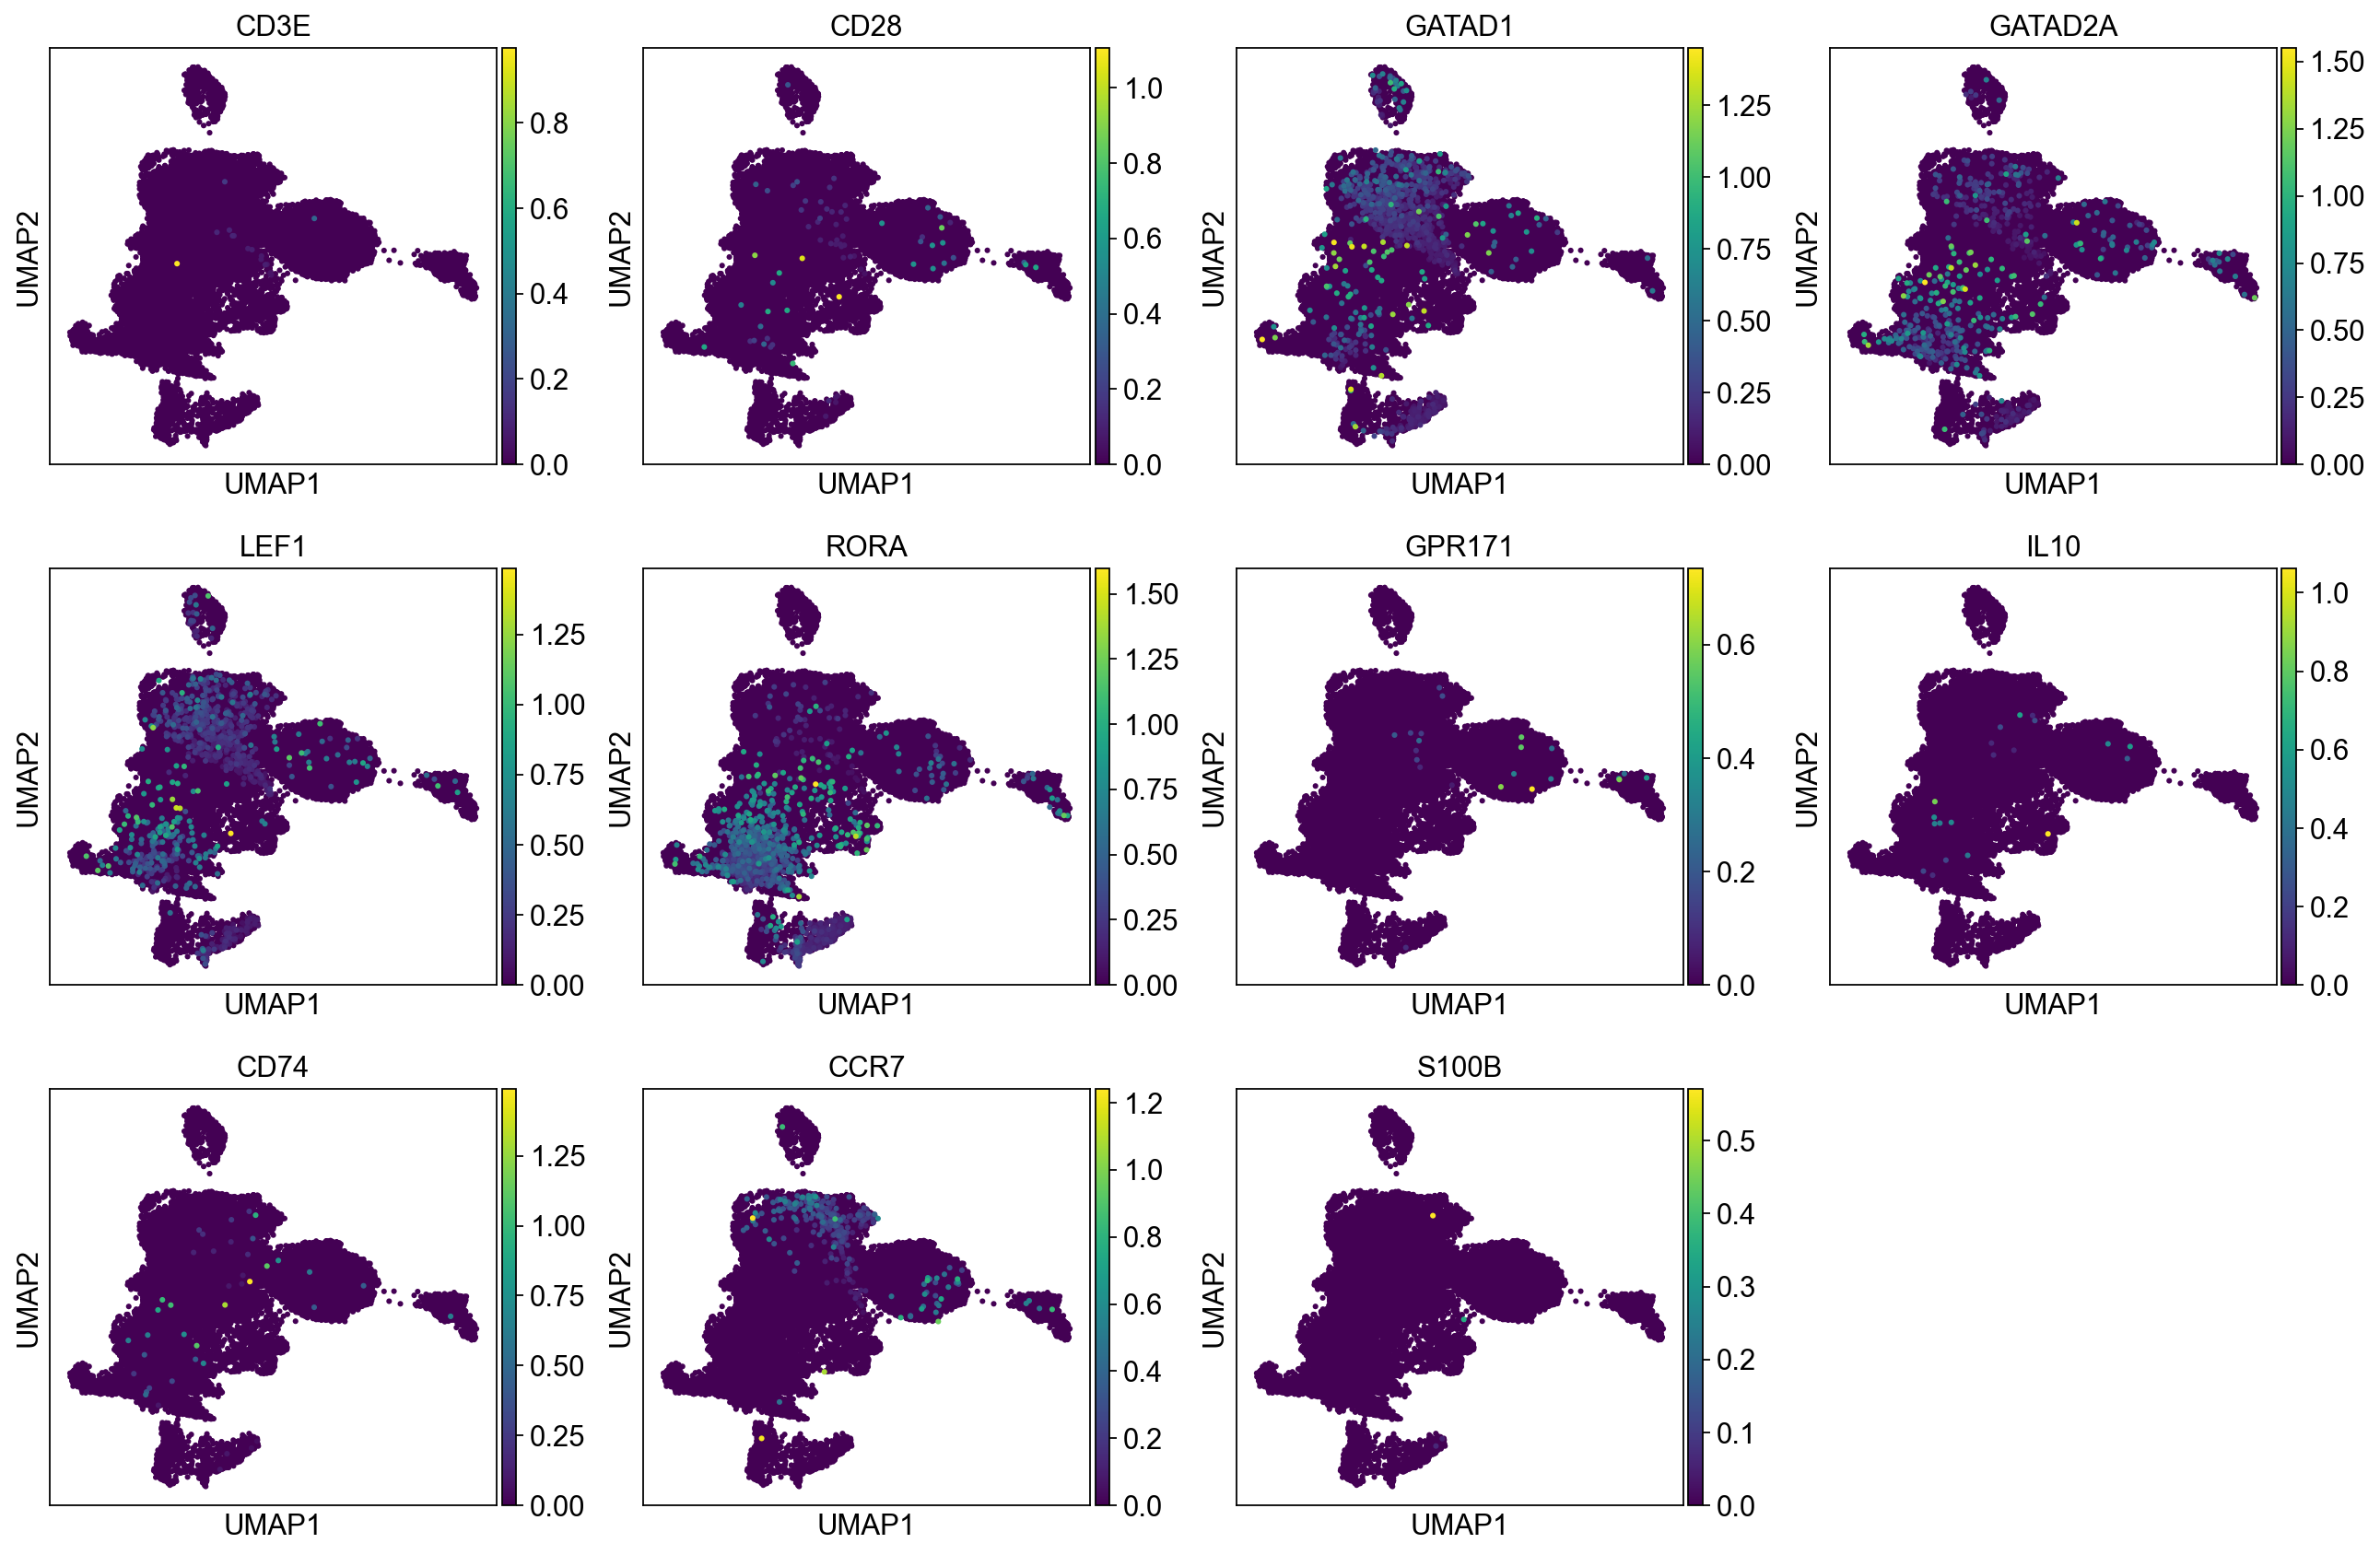

In [32]:
# Markers for T cells https://www.beckman.com/resources/cell-types/blood-cells/leukocytes/lymphocytes/t-cells
sc.pl.umap(adata, color=['CD3E', 'CD28', 'GATAD1', 'GATAD2A', 'LEF1',
                         'RORA', 'GPR171', 'IL10', 'CD74', 'CCR7',
                         'S100B', 'CXCR3', 'CD226', 'CD3D', 'CD4',
                         'NKG7', 'CD247', 'TCF7', 'GPR183_1', 'GPR183_2',
                         'ALOX5AP','RPL37','RPL38'], size=30)
sc.pl.umap(adata, color='leiden', size=30)

#### B cells

## Gene search tools
This function returns a list of genes that are present in adata (markers for example) from an input of a general list.

In [36]:
def find_gene(gene):
    GENES = list(adata.raw.var.index[adata.raw.var.index.str.startswith(gene.upper())])
    return GENES

find_gene('CXCR')

['CXCR3', 'CXCR5', 'CXCR1', 'CXCR6']